In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import torch
import torch.nn as nn
from turboflow.models.rff import RFFNet
from turboflow.dataloaders import Turbo2D_simple, load_turbo2D_simple_numpy
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from turboflow.utils import phy_utils as phy
from turboflow.utils import dsp_utils as dsp
from turboflow.utils import torch_utils as tch

In [3]:
device = tch.get_device()

Torch running on: cuda:0


In [4]:
# ds=downsampling factor
Xlr, Ulr = load_turbo2D_simple_numpy(ds=4) # low resolution (64x64)
Xmr, Umr = load_turbo2D_simple_numpy(ds=2) # mid resolution (128x128)
Xhr, Uhr = load_turbo2D_simple_numpy(ds=1) # high (max) resolution (256x256)

L = int(Xlr.shape[0]**0.5)
M = int(Xmr.shape[0]**0.5)
H = int(Xhr.shape[0]**0.5)

Y shape (64, 64, 2)
Y min, max: -2.365612 2.941536
after normalization, Y min, max: -0.8042097733972999 1.0
Y shape (128, 128, 2)
Y min, max: -2.371183 2.985797
after normalization, Y min, max: -0.7941541236728418 1.0
Y shape (256, 256, 2)
Y min, max: -2.382122 2.999472
after normalization, Y min, max: -0.7941804424245333 1.0


In [5]:
from torchvision.transforms import transforms
from PIL import Image
from matplotlib import cm

U = Ulr.reshape(L,L,2)

# add fake dimension
U1 = U[:,:,0]
U2 = U[:,:,1]
U3 = U1 + U2
U = np.concatenate([U1[...,None], U2[...,None], U3[...,None]], axis=2)

# from float to image
U = (U * 255 / np.max(U)).astype('uint8')

# apply torch transformation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor()
])

U = transform(U)

In [8]:
from turboflow.models.phyrff_vgg import VGGNet

In [9]:
from torchvision.models import vgg

net = vgg.vgg16(pretrained=True)

In [10]:
# new_classifier = nn.Sequential(*list(net.classifier.children())[:-1])
# net.classifier = new_classifier
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 64, 112, 112])


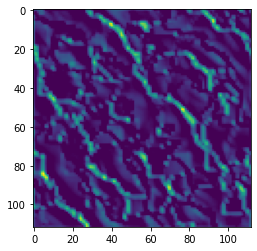

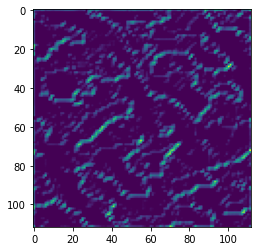

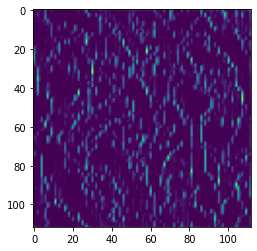

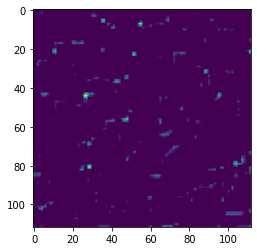

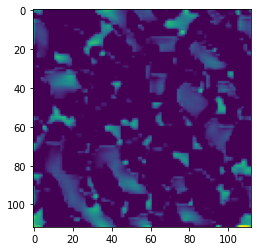

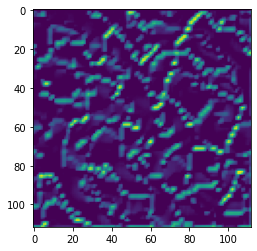

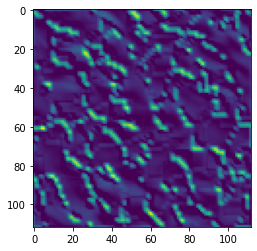

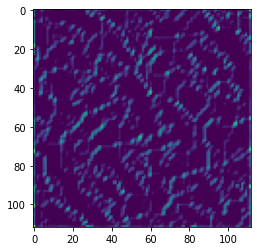

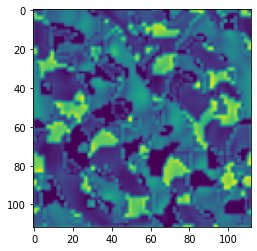

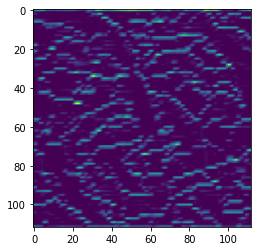

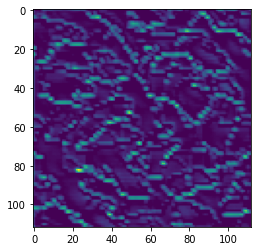

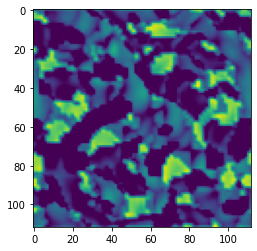

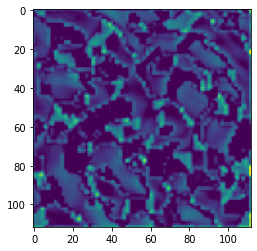

In [11]:
net = vgg.vgg16(pretrained=True)
net.features = net.features[:5]
net = net.features
print(net)

features = net(U[None,...])
print(features.shape)

for i in range(0,64,5):
    plt.imshow(features[0,i,...].detach().numpy())
    plt.show()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 128, 56, 56])


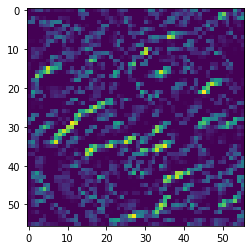

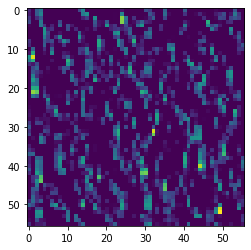

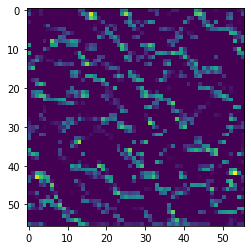

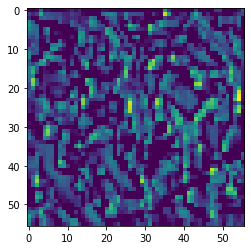

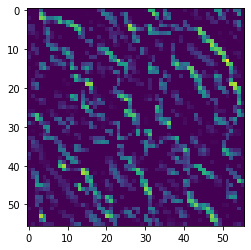

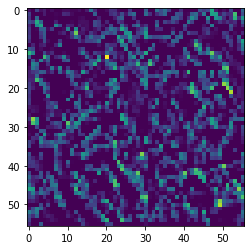

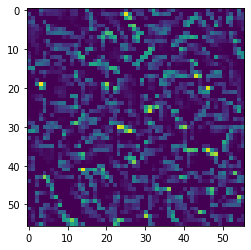

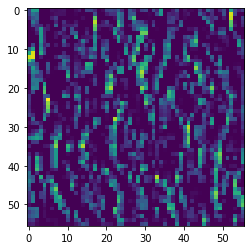

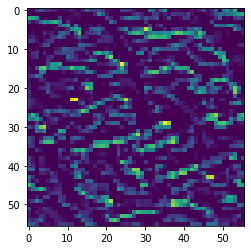

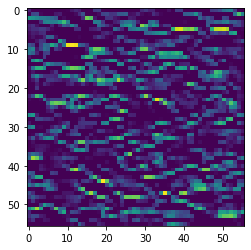

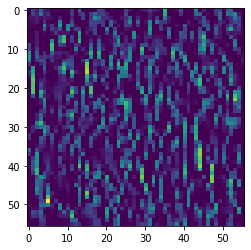

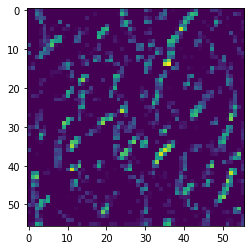

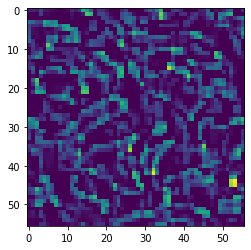

In [123]:
net = vgg.vgg16(pretrained=True)
net.features = net.features[:10]
net = net.features
print(net)

features = net(U[None,...])
print(features.shape)

for i in range(0,64,5):
    plt.imshow(features[0,i,...].detach().numpy())
    plt.show()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 256, 28, 28])


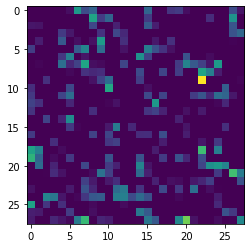

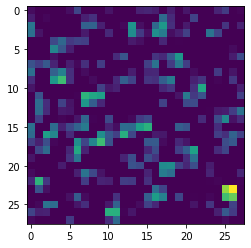

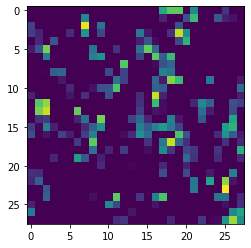

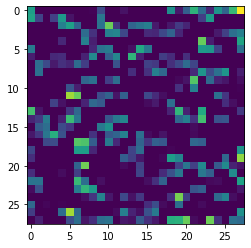

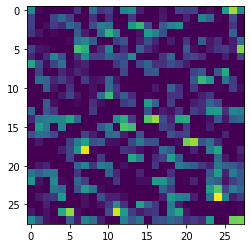

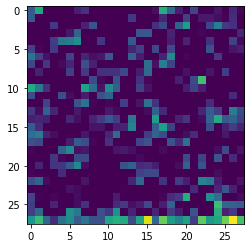

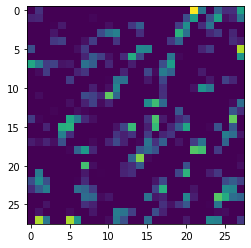

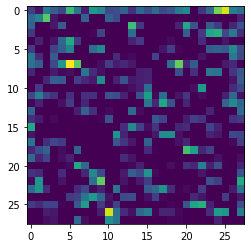

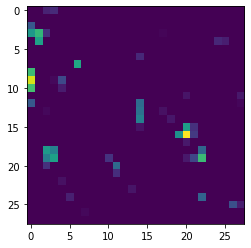

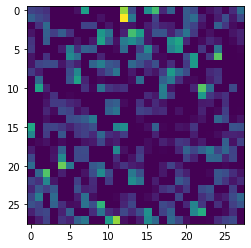

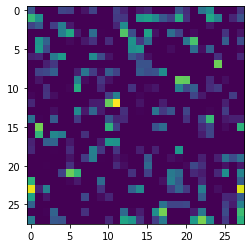

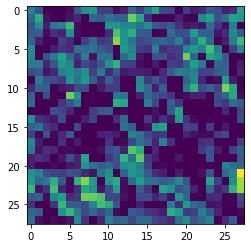

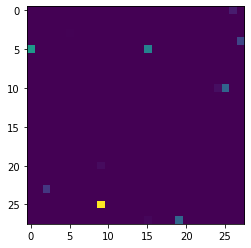

In [127]:
net = vgg.vgg16(pretrained=True)
net.features = net.features[:17]
net = net.features
print(net)

features = net(U[None,...])
print(features.shape)

for i in range(0,64,5):
    plt.imshow(features[0,i,...].detach().numpy())
    plt.show()

In [17]:
from turboflow.models.vgg import VGG

vgg = VGG()

features = vgg.get_features(Ulr, 5)
print(features.shape)

torch.Size([1, 64, 112, 112])


In [20]:
# training data
import torch
from turboflow.dataloaders import Turbo2D_simple
from torch.utils.data import Dataset, DataLoader

# set up cuda 
torch.cuda.is_available()
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
path_to_data = '../data/2021-Turb2D_velocities.npy'
trainset = Turbo2D_simple(path_to_data, device, ds=4, img=42)
trainloader = DataLoader(trainset, batch_size=6666, shuffle=False)

Dataset Turbo2D, img # 42
(64, 64, 2)
(64, 64, 2)
Original size 64
Y shape (64, 64, 2)
Y min, max: -2.365612 2.941536
after normalization, Y min, max: -0.8042097733972999 1.0


In [ ]:
from turboflow.models.vgg import VGGRFFNet
fft_scale = 10
fft_nfeat = 256
nin = 2
nout = 2
mlp_layers = [nin*fft_nfeat + 64] + [256]*3 + [nout]

vggrff = VGGRFFNet('VGGRFFNet', mlp_layers, fft_nfeat, fft_scale)
vggrff.to(device)
vggrff.fit(trainloader, epochs=3000)

Epoch: 100, Loss: (0.017496 + 106.249290) = 0.028121
Epoch: 200, Loss: (0.002126 + 76.336967) = 0.009759
Epoch: 300, Loss: (0.000948 + 65.508636) = 0.007499
Epoch: 400, Loss: (0.000667 + 57.274284) = 0.006394
Epoch: 500, Loss: (0.000536 + 50.629715) = 0.005599
